# Tensor Tutorial in pytorch

In [1]:
import torch
import numpy as np

Initializing a tensor

In [11]:
# directly from data
data = [[1,2],[3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [9]:
# from numpy array
np_array = np.array(data)
x_np = torch.tensor(np_array)

In [10]:
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [12]:
# new tensors retains the properties(shape, datatype) of the argument tensor, unless explicityly overridden

x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones tensor: \n {x_ones} \n")

Ones tensor: 
 tensor([[1, 1],
        [1, 1]]) 



In [15]:
x_rand = torch.rand_like(x_data, dtype = torch.float) # overrides the datatype of x_data
print(f"Random tensor: \n {x_rand} \n")

Random tensor: 
 tensor([[0.3728, 0.1907],
        [0.5369, 0.4060]]) 



In [16]:
x_rand.dtype

torch.float32

In [18]:
shape = (2,3,) # tuple of tensor dimension
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

In [19]:
print(f"Random tensor: \n {rand_tensor} \n")
print(f"Ones tensor: \n {ones_tensor} \n")
print(f"Zeros tensor: \n {zeros_tensor} \n")

Random tensor: 
 tensor([[0.9465, 0.8433, 0.5753],
        [0.7130, 0.9898, 0.5536]]) 

Ones tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



Attributes of a tensor

In [21]:
tensor = torch.rand(3,4)

print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')
print(f'Device of tensor is: {tensor.device}')

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device of tensor is: cpu


Operations on Tensor

In [24]:
# Standard numpy like indenxing and slicing

In [30]:
tensor = torch.ones(4,4)
print(f'First row: {tensor[0]}')
print(f'First column: {tensor[:,0]}')
print(f'Last column: {tensor[...,-1]}')
tensor[:,-1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])


In [31]:
# joining tensor using torch.cat to concatenate a sequence of tensor
# along a given dimension

In [34]:
t1 = torch.cat([tensor, tensor, tensor], dim = 1)
t1

tensor([[1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.]])

In [35]:
# Arithmetic operatiosn

In [36]:
y1 = tensor @ tensor.T # T - transpose, @ - matrix multiplication
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out = y3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [38]:
print(y1)
print(y2)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [42]:
z1 = tensor * tensor # element wise product
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out = z3)

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]])

In [45]:
# single element tensor

agg = tensor.sum()
agg_item = agg.item() # item() is used to convert the tensor to python numerical value
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [47]:
# In-place operation - Operations that store the result into the operand are 
# called in-place. They are denoted by a _ suffix. for example x.copy_(y), x.t_(), wil change x


In [48]:
print(f'{tensor} \n')
tensor.add_(5)
print(tensor)

tensor([[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]]) 

tensor([[6., 6., 6., 5.],
        [6., 6., 6., 5.],
        [6., 6., 6., 5.],
        [6., 6., 6., 5.]])


In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged.

Bridge with Numpy 


Tensor on the cpu and NumPy arrays can share their underlying memory location, changing one will change the other.

In [50]:
# tensor to NumPy array
t = torch.ones(5)
print(f't: {t}')
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [51]:
# a change in the tensor reflects in the Numpy array
t.add_(1)
print(f't: {t}')
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [53]:
# numpy array to tensor
n = np.ones(5)
t = torch.from_numpy(n)

In [55]:
# change in the Numpy array reflects in tensor
np.add(n, 1, out = n)
print(f't: {t}')
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Datasets and DataLoader

PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

We load the FashionMNIST Dataset with the following parameters:

- root is the path where the train/test data is stored,
- train specifies training or test dataset,
- download=True downloads the data from the internet if it’s not available at root.
- transform and target_transform specify the feature and label transformations

In [56]:
# libraries
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [59]:
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)


100%|██████████████████████████████████████████████████████████████████| 26421880/26421880 [02:38<00:00, 167082.48it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 141380.01it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████| 4422102/4422102 [00:20<00:00, 217586.50it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 3573696.95it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [ ]:
Iterating and visualizing the data

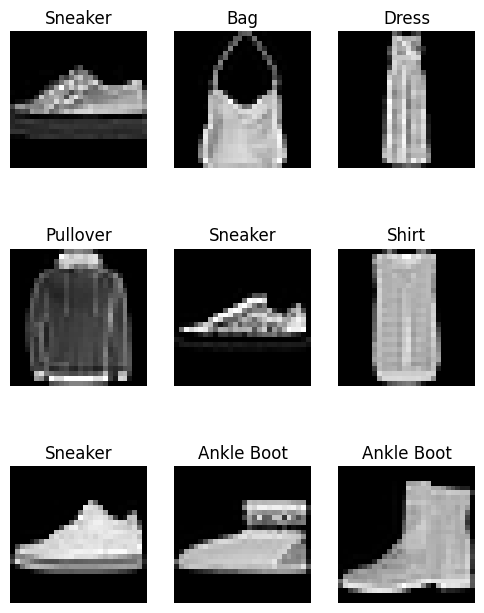

In [69]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

figure = plt.figure(figsize = (6,8))
cols, rows = 3,3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size = (1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap = 'gray')
    
plt.show()
    
    

Preparing your data for training with DataLoaders

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [74]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

Iterate through the DataLoader

We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at Samplers).

Features batch shape: torch.Size([64, 1, 28, 28])
Lables batch shape: torch.Size([64])


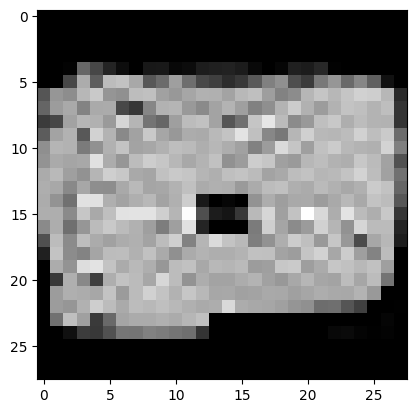

Lable: 8


In [78]:
# display the image and label.
train_features, train_label = next(iter(train_dataloader))
print(f'Features batch shape: {train_features.size()}')
print(f'Lables batch shape: {train_label.size()}')
img = train_features[0].squeeze()
label = train_label[0]
plt.imshow(img, cmap = 'gray')
plt.show()
print(f'Lable: {label}')

Transforms

Data does not always come in its final processed form that is required for training machine learning algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters -transform to modify the features and target_transform to modify the labels - that accept callables containing the transformation logic. The torchvision.transforms module offers several commonly-used transforms out of the box.

In [97]:
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = False,
    transform = ToTensor(),
    target_transform = Lambda(lambda y : torch.zeros(10, dtype = torch.float).scatter_(0,
                                                                                      torch.tensor(y), value = 1))
)

In [98]:
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()

## BUILD THE NEURAL NETWORK
Neural networks comprise of layers/modules that perform operations on data. The torch.nn namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the nn.Module. A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

In [99]:
# libraries
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [100]:
# get device for training

device  = (
    'cuda'
    if torch.cuda.is_available()
    else 'mps'
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f'Using {device} device')

Using cpu device


Define the Class

We define our neural network by subclassing nn.Module, and initializer the neural network layers in __init__. Every nn.Module subclass implements the operation on input data in the forward method.

In [106]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
        )
        
    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [107]:
# we create a instance of NeuralNetwok, and move it to the device, and print the structure

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes the model’s forward, along with some background operations. Do not call model.forward() directly

Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output. We get the prediction probabilities by passing it through an instance of the nn.Softmax module.

In [110]:
X = torch.rand(1,28,28, device = device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f'Predicted class: {y_pred}')

Predicted class: tensor([8])


Model Layer

In [117]:
input_image = torch.rand(3,28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


In [118]:
# we iniitalize the nn.Flatten layer to convert each 2D 28*28 image into a 
# contiguous array 784 pixel value (the minibatch dimension(at dim = 0) is mainitained)

flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [122]:
# The linear layer is a module that applies a linear transformation on the input 
# using its stored weights and biases

layer1 = nn.Linear(in_features = 28*28, out_features = 20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [123]:
# Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after
# linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.

print(f"Before ReLU : {hidden1} \n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU : tensor([[-0.6946, -0.1054,  0.3294,  0.2081, -0.1172, -0.1303,  0.2793,  0.1106,
          0.1748, -0.2488,  0.1634,  0.1532, -0.1558,  0.1037,  0.3459,  0.0150,
          0.0238, -0.3269, -0.2303,  0.1686],
        [-0.3919,  0.2088,  0.0031,  0.0606, -0.0564,  0.0970,  0.2456,  0.1495,
          0.0789, -0.4110,  0.4873, -0.3229, -0.4636,  0.1440,  0.3136,  0.0349,
          0.1869,  0.0795, -0.0622,  0.1761],
        [-0.6531, -0.1652,  0.1057, -0.0121,  0.0628, -0.1260,  0.1707, -0.4168,
          0.3369, -0.4082, -0.0405, -0.1800, -0.2520, -0.2121,  0.3532,  0.2078,
          0.1726, -0.0210,  0.1294,  0.3164]], grad_fn=<AddmmBackward0>) 


After ReLU: tensor([[0.0000, 0.0000, 0.3294, 0.2081, 0.0000, 0.0000, 0.2793, 0.1106, 0.1748,
         0.0000, 0.1634, 0.1532, 0.0000, 0.1037, 0.3459, 0.0150, 0.0238, 0.0000,
         0.0000, 0.1686],
        [0.0000, 0.2088, 0.0031, 0.0606, 0.0000, 0.0970, 0.2456, 0.1495, 0.0789,
         0.0000, 0.4873, 0.0000, 0.0000, 0.1440, 0.

nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.

In [124]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10)
)

input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

nn.Softmax

The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.

In [126]:
softmax = nn.Softmax(dim = 1)
pred_probab = softmax(logits)


Model Parameters

Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. Subclassing nn.Module automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s parameters() or named_parameters() methods.

In this example, we iterate over each parameter, and print its size and a preview of its values.

In [128]:
print(f"Model sturcture: {model} \n\n")

for name, param in model.named_parameters():
    print(f"Layer : {name} | Size : {param.size()} | Values : {param[:2]} \n")

Model sturcture: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer : linear_relu_stack.0.weight | Size : torch.Size([512, 784]) | Values : tensor([[-0.0265, -0.0262, -0.0304,  ...,  0.0178,  0.0197,  0.0027],
        [-0.0121, -0.0202,  0.0329,  ...,  0.0211, -0.0099,  0.0172]],
       grad_fn=<SliceBackward0>) 

Layer : linear_relu_stack.0.bias | Size : torch.Size([512]) | Values : tensor([-0.0019,  0.0059], grad_fn=<SliceBackward0>) 

Layer : linear_relu_stack.2.weight | Size : torch.Size([512, 512]) | Values : tensor([[-0.0365,  0.0103,  0.0043,  ...,  0.0131,  0.0309,  0.0361],
        [ 0.0410, -0.0206, -0.0088,  ...,  0.0198,  0.0356,  0.0317]],
       grad_fn=<SliceBackward0>) 

Layer : linear_relu_stack.2

## AUTOMATIC DIFFERENTIATION WITH TORCH.AUTOGRAD
When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. It supports automatic computation of gradient for any computational graph.

Consider the simplest one-layer neural network, with input x, parameters w and b, and some loss function. It can be defined in PyTorch in the following manner:

In [138]:
import torch
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5,3, requires_grad = True)
b = torch.randn(3, requires_grad = True)
z = torch.matmul(x,w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)
loss

tensor(2.7033, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

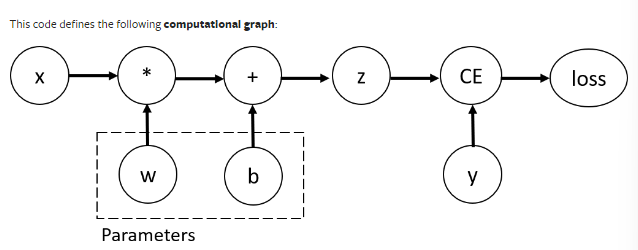

In [139]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x00000178647FE920>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x00000178647FEAD0>


Computing Gradients

To optimize weights of parameters in the neural network, we need to compute the derivatives of our loss function with respect to parameters, namely, we need ∂loss/∂w and ∂loss/∂b under some fixed values of x and y. To compute those derivatives, we call loss.backward(), and then retrieve the values from w.grad and b.grad:

In [140]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3207, 0.2991, 0.3077],
        [0.3207, 0.2991, 0.3077],
        [0.3207, 0.2991, 0.3077],
        [0.3207, 0.2991, 0.3077],
        [0.3207, 0.2991, 0.3077]])
tensor([0.3207, 0.2991, 0.3077])


Tensor Gradients and Jocobian Products

In [145]:
inp = torch.eye(4,5, requires_grad = True)
out = (inp + 1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph = True)
print(f'First call \n {inp.grad}')
out.backward(torch.ones_like(out), retain_graph = True)
print(f'Second call \n {inp.grad}')
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph = True)
print(f'\nCall after zeroing gradients \n {inp.grad}')

First call 
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])
Second call 
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients 
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


 when we call backward for the second time with the same argument, the value of the gradient is different. This happens because when doing backward propagation, PyTorch accumulates the gradients, i.e. the value of computed gradients is added to the grad property of all leaf nodes of computational graph. If you want to compute the proper gradients, you need to zero out the grad property before. In real-life training an optimizer helps us to do this.

## Optimizing Model Parameters

In [147]:
# hyper parameter 
learning_rate = 1e-3
batch_size = 64
epochs = 5


In [150]:
# Loss function
loss_fn = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [151]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [162]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X,y) in enumerate(dataloader):
        # compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch %100 == 0:
            loss, current = loss.item(), (batch + 1) * len(x)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X,y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= num_batches
    correct /= size
    print(f'Test Error: \n Accuracy : {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')

In [163]:
for t in range(epochs):
    print(f"Epoch {t+1} \n ---------------")
    train_loop(train_dataloader, model, loss_fn,optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1 
 ---------------
loss: 1.611275  [    5/60000]
loss: 1.448479  [  505/60000]
loss: 1.386432  [ 1005/60000]
loss: 1.421806  [ 1505/60000]
loss: 1.353652  [ 2005/60000]
loss: 1.408675  [ 2505/60000]
loss: 1.356298  [ 3005/60000]
loss: 1.304701  [ 3505/60000]
loss: 1.172245  [ 4005/60000]
loss: 1.364748  [ 4505/60000]
Test Error: 
 Accuracy : 63.8%, Avg loss: 1.281561 

Epoch 2 
 ---------------
loss: 1.429335  [    5/60000]
loss: 1.225221  [  505/60000]
loss: 1.136784  [ 1005/60000]
loss: 1.199352  [ 1505/60000]
loss: 1.320439  [ 2005/60000]
loss: 1.193167  [ 2505/60000]
loss: 1.209199  [ 3005/60000]
loss: 1.247606  [ 3505/60000]
loss: 1.069722  [ 4005/60000]
loss: 1.108620  [ 4505/60000]
Test Error: 
 Accuracy : 64.9%, Avg loss: 1.103605 

Epoch 3 
 ---------------
loss: 1.157090  [    5/60000]
loss: 1.091165  [  505/60000]
loss: 1.037672  [ 1005/60000]
loss: 1.081452  [ 1505/60000]
loss: 0.879397  [ 2005/60000]
loss: 1.029966  [ 2505/60000]
loss: 0.967707  [ 3005/60000]
loss: 